# 2.6 - Multimodal architectures

Course's materials require a `tensorflow` version lower than the default one used in Google Colab. Run the following cell to downgrade TensorFlow accordingly.

In [ ]:
import os
def downgrade_tf_version():
    os.system("!yes | pip uninstall -y tensorflow")
    os.system("!yes | pip install tensorflow==2.12.0")
    os.kill(os.getpid(), 9)
downgrade_tf_version()

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


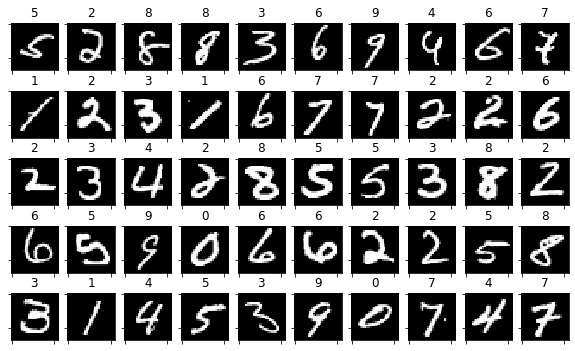

In [4]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## A regular neural network for classification

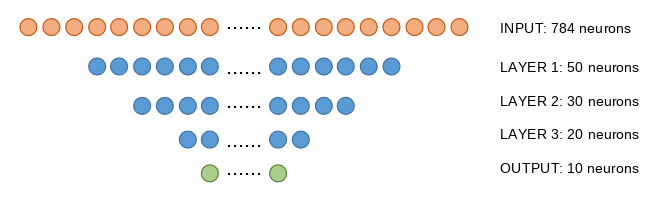

In [5]:
Image(filename='local/imgs/ann1.png')

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [6]:
yoh = np.eye(10)[y]

In [7]:
i = np.random.randint(len(y))
y[i], yoh[i]

(0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### create the model

In [9]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [10]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [13]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


### fit and display losses

In [14]:
model.fit(X_train, y_train_oh, epochs=100, batch_size=32, validation_data=(X_test, y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/100
300/300 [==============================] - 0s 1ms/sample - loss: 2.2274 - val_loss: 2.1210
Epoch 2/100
300/300 [==============================] - 0s 201us/sample - loss: 1.9919 - val_loss: 1.9278
Epoch 3/100
300/300 [==============================] - 0s 224us/sample - loss: 1.7531 - val_loss: 1.7165
Epoch 4/100
300/300 [==============================] - 0s 185us/sample - loss: 1.4943 - val_loss: 1.4922
Epoch 5/100
300/300 [==============================] - 0s 188us/sample - loss: 1.2550 - val_loss: 1.3319
Epoch 6/100
300/300 [==============================] - 0s 196us/sample - loss: 1.0457 - val_loss: 1.2062
Epoch 7/100
300/300 [==============================] - 0s 199us/sample - loss: 0.8917 - val_loss: 1.0992
Epoch 8/100
300/300 [==============================] - 0s 186us/sample - loss: 0.7668 - val_loss: 1.0182
Epoch 9/100
300/300 [==============================] - 0s 184us/sample - loss: 0.6596 - val_loss: 0.9711
Epoch 10/1

Epoch 78/100
300/300 [==============================] - 0s 169us/sample - loss: 0.0020 - val_loss: 0.9448
Epoch 79/100
300/300 [==============================] - 0s 145us/sample - loss: 0.0019 - val_loss: 0.9469
Epoch 80/100
300/300 [==============================] - 0s 156us/sample - loss: 0.0018 - val_loss: 0.9510
Epoch 81/100
300/300 [==============================] - 0s 143us/sample - loss: 0.0018 - val_loss: 0.9532
Epoch 82/100
300/300 [==============================] - 0s 155us/sample - loss: 0.0017 - val_loss: 0.9547
Epoch 83/100
300/300 [==============================] - 0s 142us/sample - loss: 0.0017 - val_loss: 0.9541
Epoch 84/100
300/300 [==============================] - 0s 149us/sample - loss: 0.0017 - val_loss: 0.9589
Epoch 85/100
300/300 [==============================] - 0s 142us/sample - loss: 0.0016 - val_loss: 0.9624
Epoch 86/100
300/300 [==============================] - 0s 151us/sample - loss: 0.0016 - val_loss: 0.9668
Epoch 87/100
300/300 [========================

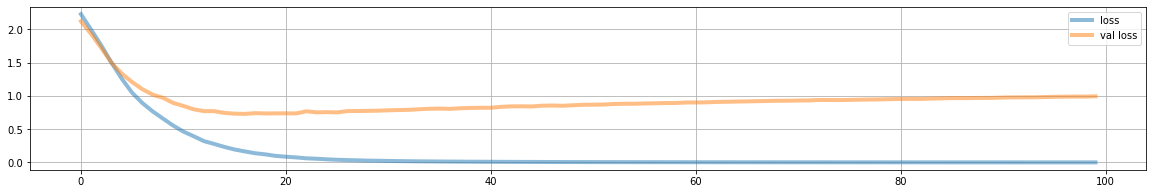

In [15]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [16]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.798


## Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

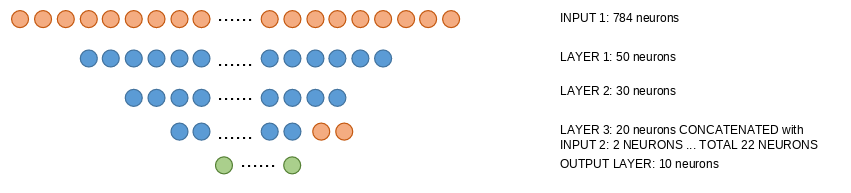

In [17]:
Image(filename='local/imgs/ann2.png')

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [30]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,), name="input_img")
    l11 = Dense(s1, activation="relu", name="dense1")(inp1)
    l12 = Dense(s2, activation="relu", name="dense2")(l11)
    l13 = Dense(s3, activation=s3_activation, name="dense3")(l12)
    
    inp2 = Input(shape=(extra_info_dim,), name="input_extra")
    cc1 = tf.concat([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax', name="output")(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [31]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [32]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense1 (Dense)                  (None, 50)           39250       input_img[0][0]                  
__________________________________________________________________________________________________
dense2 (Dense)                  (None, 30)           1530        dense1[0][0]                     
__________________________________________________________________________________________________
dense3 (Dense)                  (None, 20)           620         dense2[0][0]                     
______________________________________________________________________________________________

In [25]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=100, batch_size=32, 
          validation_data=([X_test, X_test_extra], y_test_oh))

Train on 300 samples, validate on 1200 samples
Epoch 1/200
300/300 [==============================] - 0s 1ms/sample - loss: 2.2208 - val_loss: 2.0656
Epoch 2/200
300/300 [==============================] - 0s 186us/sample - loss: 1.9353 - val_loss: 1.8616
Epoch 3/200
300/300 [==============================] - 0s 197us/sample - loss: 1.6757 - val_loss: 1.6130
Epoch 4/200
300/300 [==============================] - 0s 196us/sample - loss: 1.4212 - val_loss: 1.3889
Epoch 5/200
300/300 [==============================] - 0s 200us/sample - loss: 1.1756 - val_loss: 1.2010
Epoch 6/200
300/300 [==============================] - 0s 193us/sample - loss: 0.9764 - val_loss: 1.0640
Epoch 7/200
300/300 [==============================] - 0s 197us/sample - loss: 0.8130 - val_loss: 0.9314
Epoch 8/200
300/300 [==============================] - 0s 196us/sample - loss: 0.6877 - val_loss: 0.8559
Epoch 9/200
300/300 [==============================] - 0s 193us/sample - loss: 0.5882 - val_loss: 0.7672
Epoch 10/2

Epoch 78/200
300/300 [==============================] - 0s 173us/sample - loss: 0.0097 - val_loss: 0.5047
Epoch 79/200
300/300 [==============================] - 0s 159us/sample - loss: 0.0095 - val_loss: 0.5053
Epoch 80/200
300/300 [==============================] - 0s 162us/sample - loss: 0.0093 - val_loss: 0.5030
Epoch 81/200
300/300 [==============================] - 0s 159us/sample - loss: 0.0090 - val_loss: 0.5055
Epoch 82/200
300/300 [==============================] - 0s 162us/sample - loss: 0.0089 - val_loss: 0.5067
Epoch 83/200
300/300 [==============================] - 0s 153us/sample - loss: 0.0087 - val_loss: 0.5096
Epoch 84/200
300/300 [==============================] - 0s 152us/sample - loss: 0.0085 - val_loss: 0.5097
Epoch 85/200
300/300 [==============================] - 0s 153us/sample - loss: 0.0083 - val_loss: 0.5113
Epoch 86/200
300/300 [==============================] - 0s 152us/sample - loss: 0.0081 - val_loss: 0.5107
Epoch 87/200
300/300 [========================

Epoch 155/200
300/300 [==============================] - 0s 164us/sample - loss: 0.0028 - val_loss: 0.5574
Epoch 156/200
300/300 [==============================] - 0s 171us/sample - loss: 0.0028 - val_loss: 0.5584
Epoch 157/200
300/300 [==============================] - 0s 165us/sample - loss: 0.0028 - val_loss: 0.5589
Epoch 158/200
300/300 [==============================] - 0s 167us/sample - loss: 0.0027 - val_loss: 0.5586
Epoch 159/200
300/300 [==============================] - 0s 171us/sample - loss: 0.0027 - val_loss: 0.5589
Epoch 160/200
300/300 [==============================] - 0s 160us/sample - loss: 0.0027 - val_loss: 0.5604
Epoch 161/200
300/300 [==============================] - 0s 170us/sample - loss: 0.0027 - val_loss: 0.5613
Epoch 162/200
300/300 [==============================] - 0s 157us/sample - loss: 0.0026 - val_loss: 0.5614
Epoch 163/200
300/300 [==============================] - 0s 167us/sample - loss: 0.0026 - val_loss: 0.5617
Epoch 164/200
300/300 [==============

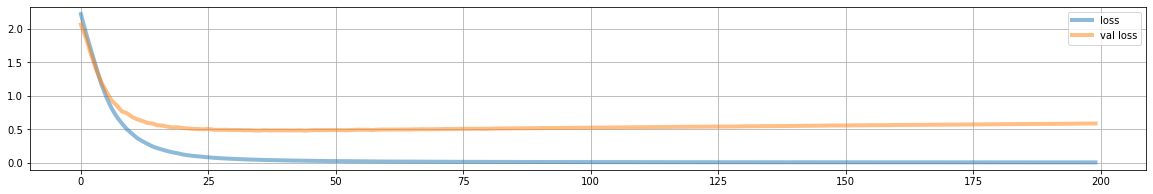

In [26]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [27]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

accuracy train 1.000
accuracy test  0.835
